## Velocity Plot

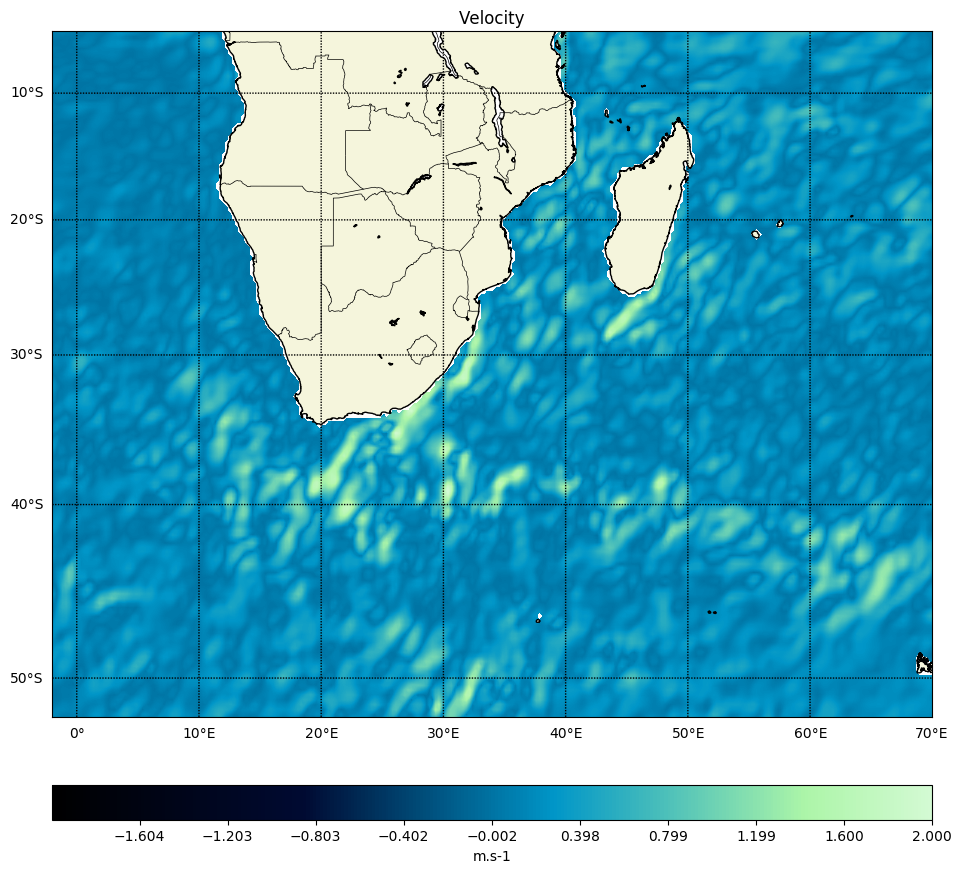

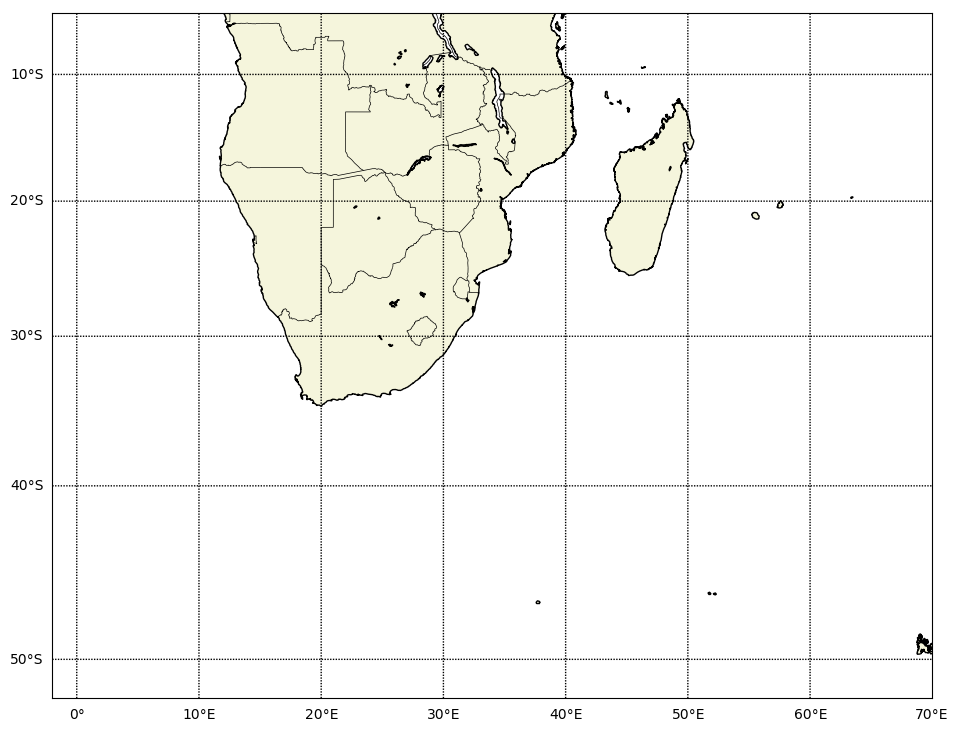

In [9]:
#%% Plotting GlobCurrent Velocity
# By Michael Hart-Davis

import pandas
import netCDF4
from   mpl_toolkits.basemap import Basemap
from   mpl_toolkits.basemap import cm as cma
import matplotlib.pyplot as plt
from   netCDF4 import Dataset as open_ncfile
import numpy as np
import cmocean as cm
import netCDF4
from datetime import datetime, timedelta
#-- open netcdf file
drifters = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")
x = 0

start = drifters.date[x]
date = datetime.strptime(start, "%Y/%m/%d")
travel = drifters.days_travelled[x]
ID = drifters.id[x]

dates = [date +  timedelta(days=y) for y in range(0, 1)] #TRAVEL

globfiles = ["/Users/hart-davis/Desktop/Scripts/GlobCurrent_Daily/"+y.strftime("%Y%m%d") + "-GLOBCURRENT-L4-CUReul_15m-ALT_SUM-v03.0-fv01.0.nc" for y in dates]
nc = open_ncfile(globfiles[0])

east = nc.variables["eastward_eulerian_current_velocity"][0,:,:]
north = nc.variables["northward_eulerian_current_velocity"][0,:,:]

vel = east + north
np.shape(vel)

lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

speed = np.sqrt(east**2+north**2)
#-- create figure and axes instances
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- create map
map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents(color="beige")
map.drawparallels(np.arange( -90., 90.,10.),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,0,1],fontsize=10)

#-- convert latitude/longitude values to plot x/y values
x, y = map(*np.meshgrid(lon,lat))

#-- draw filled contours
cnplot = map.contourf(x,y,velocity,cmap=cma.GMT_ocean,levels=np.linspace(-2,2,1000))

#-- add colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")
cbar.set_label('m.s-1')
plt.title('Velocity')
plt.plot()

fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents(color="beige")
map.drawparallels(np.arange( -90., 90.,10.),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,0,1],fontsize=10)
map.streamplot(x,y,east,north,color=speed,density=2, cmap=plt.cm.bone, linewidth=2*speed)
plt.plot()
plt.show()
